In [1]:
# https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.nodc:NCRMP-Fish-USVI#

# The dataset is a result of a survey conducted by NOAA National Centers for Coastal Ocean Science in collaboration
# with NOAA National Marine Fisheries Service, and a few other organizations. The data was collected in 2017 using the
# stationary point-count method and consists of data such as the sample depth, underwater visibility, habitat type,
# regions, length, strat, number of species, type of species, and common/scientific names.
#
# Target Feature: Strata Description

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import time

dataset = pd.read_csv('dataset.csv')
dataset.info()

c:\users\shreeja\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1,2,6,7,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197515 entries, 0 to 197514
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   time                         197515 non-null  object 
 1   latitude                     197515 non-null  object 
 2   longitude                    197515 non-null  object 
 3   date_utc                     197515 non-null  object 
 4   primary_sample_unit          197514 non-null  float64
 5   station_nr                   197514 non-null  float64
 6   sample_depth                 197515 non-null  object 
 7   underwater_visibility        197515 non-null  object 
 8   grid_id                      197514 non-null  float64
 9   habitat_cd                   197514 non-null  object 
 10  habitat_type                 197514 non-null  object 
 11  depth_strat                  197514 non-null  object 
 12  depth_strat_description      197514 non-null  object 
 13 

In [3]:
dataset.head(5)

,time,latitude,longitude,date_utc,primary_sample_unit,station_nr,sample_depth,underwater_visibility,grid_id,habitat_cd,...,common_name,len,num,time_seen,prot,strat,strat_description,region,region_description,accession_url
0,UTC,degrees_north,degrees_east,UTC,NaN,NaN,m,m,NaN,NaN,...,NaN,cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-15T00:00:00Z,17.7895,-64.62008,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,387865.0,BDRK,...,barred cardinalfish,0.0,0.0,1.0,0.0,BDRK_SHLW,Bedrock shallow,STX,St. Croix - U.S. Virgin Islands,https://accession.nodc.noaa.gov/0176080
2,2017-06-15T00:00:00Z,17.7895,-64.62008,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,387865.0,BDRK,...,goldentail moray,0.0,0.0,1.0,0.0,BDRK_SHLW,Bedrock shallow,STX,St. Croix - U.S. Virgin Islands,https://accession.nodc.noaa.gov/0176080
3,2017-06-15T00:00:00Z,17.7895,-64.62008,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,387865.0,BDRK,...,fringed filefish,0.0,0.0,1.0,0.0,BDRK_SHLW,Bedrock shallow,STX,St. Croix - U.S. Virgin Islands,https://accession.nodc.noaa.gov/0176080
4,2017-06-15T00:00:00Z,17.7895,-64.62008,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,387865.0,BDRK,...,ocean surgeon,3.0,0.0,1.0,0.0,BDRK_SHLW,Bedrock shallow,STX,St. Croix - U.S. Virgin Islands,https://accession.nodc.noaa.gov/0176080


In [4]:
dataset.isnull().sum()

time                              0
latitude                          0
longitude                         0
date_utc                          0
primary_sample_unit               1
station_nr                        1
sample_depth                      0
underwater_visibility             0
grid_id                           1
habitat_cd                        1
habitat_type                      1
depth_strat                       1
depth_strat_description           1
sub_region                        1
sub_region_name_description       1
admin                             1
administration_description        1
species_nr                        1
species_cd                        1
scientific_name                1321
common_name                    1321
len                               0
num                               1
time_seen                         1
prot                              1
strat                             1
strat_description                 1
region                      

In [5]:
print(dataset.habitat_type.unique())

[nan 'Bedrock' 'Aggregate reef' 'Hard (unknown)'
 'Patch reef (Aggregate and individual)' 'Pavement'
 'Scattered coral and rock']


The habitat types were prioritized in descending order:
1. Aggregate reef
2. Patch reef
3. Bedrock
4. Pavement
5. Scattered Reef/Coral
6. Predicted hardbottom


In [6]:
print(dataset.administration_description.unique())

[nan 'Buck Island Reef National Monument' 'St. Croix East End Marine Park'
 'All non-managed areas'
 'Salt River National Historical Park and Ecological Preserve'
 'Virgin Islands Coral Reef National Monument'
 'Virgin Islands National Park' 'St. Thomas East End Reserves']


Sample unites were classified into one of the 7 administrative zones
1. VICR- the Virgin Islands Coral Reef National Monument
2. VIIS- the Virgin Islands National Park
3. STEER-the St.Thomas East End Reserve
4. BUIS- The Buck Island Reef National Monument
5. EEMP- The East End Marine Park (Assuming this is the St.Croix East End Marine Park)
6. SARI- Salt River Bay National Historic Park and Ecological Preservce
7. OPEN- the remaining units ( Assuming this is the non-managed areas)

In [7]:
print(dataset.len.unique())

['cm' '0.0' '3.0' '8.0' '10.0' '12.0' '14.0' '15.0' '17.0' '7.0' '18.0'
 '25.0' '13.0' '16.0' '5.0' '32.0' '4.0' '20.0' '37.0' '6.0' '9.0' '2.0'
 '11.0' '28.0' '22.0' '1.0' '23.0' '19.0' '26.0' '31.0' '27.0' '35.0'
 '29.0' '34.0' '24.0' '21.0' '52.0' '30.0' '53.0' '150.0' '190.0' '33.0'
 '38.0' '40.0' '180.0' '45.0' '50.0' '36.0' '233.0' '275.0' '42.0' '48.0'
 '101.0' '85.0' '90.0' '152.0' '44.0' '41.0' '60.0' '59.0' '39.0' '61.0'
 '100.0' '68.0' '70.0' '47.0' '250.0' '300.0' '65.0' '120.0' '75.0'
 '110.0' '92.0' '112.0' '102.0' '55.0' '170.0' '95.0' '140.0' '80.0'
 '200.0' 4.0 5.0 6.0 7.0 10.0 0.0 16.0 1.0 3.0 8.0 9.0 11.0 12.0 13.0 14.0
 18.0 22.0 15.0 26.0 21.0 24.0 25.0 27.0 30.0 17.0 19.0 20.0 2.0 34.0 88.0
 29.0 28.0 32.0 122.0 105.0 23.0 62.0 90.0 40.0 33.0 100.0 150.0 85.0 31.0
 42.0 38.0 35.0 55.0 110.0 47.0 50.0 45.0 60.0 39.0 56.0 57.0 130.0 170.0
 53.0 46.0 70.0 37.0 51.0 52.0 80.0 41.0 54.0 36.0 49.0 95.0 75.0 140.0
 200.0 72.0 63.0 43.0 68.0 120.0 135.0 65.0 64.0 44.0 102

In [8]:
print(dataset.underwater_visibility.unique())

['m' '9.5' '17.5' '16.0' '20.0' '13.0' '14.5' '15.0' '25.0' '11.0' '16.5'
 '23.5' '17.0' '27.5' '22.5' '7.5' '11.5' '14.0' '13.5' '23.0' '12.5'
 '21.5' '19.0' '18.0' '12.0' '18.5' 14.0 16.0 15.0 20.0 15.5 9.5 11.0 13.5
 17.5 22.5 11.5 12.5 10.5 10.0 14.5 16.5 8.5 18.0 18.5 12.0 21.0 22.0 19.0
 17.0 23.5 19.5 25.0 26.0 13.0 8.0 9.0 7.0 27.5 7.5 6.5 5.0 23.0]


In [9]:
print(dataset.region.value_counts())

STTSTJ    139465
STX        58049
Name: region, dtype: int64


In [10]:
##According to the paper Sampling Design Protocol for the U.S. Caribbean and Flower
##Garden Banks National Marine Sanctuary: 2013 to 2015, some of the units were classified
##into biotopes independently of the administration zone : MSR, SLRK, STJ, STT, but our dataset only has STX and STTSTJ
##which I can't make sense of    
    
    
    

In [11]:
print(dataset.strat.value_counts())

HARD_DEEP    40874
AGRF_DEEP    33932
AGRF_SHLW    27024
PVMT_DEEP    26200
PTRF_DEEP    19262
PVMT_SHLW    13634
PTRF_SHLW    12903
BDRK_SHLW    11231
SCR_DEEP      5890
SCR_SHLW      3782
HARD_SHLW     1750
BDRK_DEEP     1032
Name: strat, dtype: int64


In [12]:
print(dataset.strat_description.value_counts())

Hard (unknown) deep                              40874
Aggregate reef deep                              33932
Aggregate reef shallow                           27024
Pavement deep                                    26200
Patch reef (Aggregate and individual) deep       19262
Pavement shallow                                 13634
Patch reef (Aggregate and individual) shallow    12903
Bedrock shallow                                  11231
Scattered coral and rock deep                     5890
Scattered coral and rock shallow                  3782
Hard (unknown) shallow                            1750
Bedrock deep                                      1032
Name: strat_description, dtype: int64


In order to achieve the desired results the allocation proceeded in two phases. First samples were
allocated to each administrative zone. Then sampling units were allocated to each stratum
according to the following formula:
n_h = n_h_min + n_admin_remainder [N_h / sum(N_h]
where n_h_min = 2, n_admin_remainder = the number of samples allocated to an administrative
zone after the minimum sample size requirement is met, and N_h = number of sample units in
stratum h.

In [13]:
print(dataset.num.value_counts())

0.000     162088
1.000       9232
0.500       8753
2.000       3703
3.000       1950
           ...  
2.058          1
55.750         1
3.279          1
1.393          1
1.070          1
Name: num, Length: 635, dtype: int64


In [14]:
dataset.loc[0]

time                                     UTC
latitude                       degrees_north
longitude                       degrees_east
date_utc                                 UTC
primary_sample_unit                      NaN
station_nr                               NaN
sample_depth                               m
underwater_visibility                      m
grid_id                                  NaN
habitat_cd                               NaN
habitat_type                             NaN
depth_strat                              NaN
depth_strat_description                  NaN
sub_region                               NaN
sub_region_name_description              NaN
admin                                    NaN
administration_description               NaN
species_nr                               NaN
species_cd                               NaN
scientific_name                          NaN
common_name                              NaN
len                                       cm
num       

In [15]:
dataset.drop(dataset.index[0], inplace = True)
#dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
#plt.show()

In [16]:
dataset.isnull().sum()

time                              0
latitude                          0
longitude                         0
date_utc                          0
primary_sample_unit               0
station_nr                        0
sample_depth                      0
underwater_visibility             0
grid_id                           0
habitat_cd                        0
habitat_type                      0
depth_strat                       0
depth_strat_description           0
sub_region                        0
sub_region_name_description       0
admin                             0
administration_description        0
species_nr                        0
species_cd                        0
scientific_name                1320
common_name                    1320
len                               0
num                               0
time_seen                         0
prot                              0
strat                             0
strat_description                 0
region                      

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197514 entries, 1 to 197514
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   time                         197514 non-null  object 
 1   latitude                     197514 non-null  object 
 2   longitude                    197514 non-null  object 
 3   date_utc                     197514 non-null  object 
 4   primary_sample_unit          197514 non-null  float64
 5   station_nr                   197514 non-null  float64
 6   sample_depth                 197514 non-null  object 
 7   underwater_visibility        197514 non-null  object 
 8   grid_id                      197514 non-null  float64
 9   habitat_cd                   197514 non-null  object 
 10  habitat_type                 197514 non-null  object 
 11  depth_strat                  197514 non-null  object 
 12  depth_strat_description      197514 non-null  object 
 13 

In [18]:
dataset['species_nr'].unique()

array([  2.,   5.,   6.,   7.,   8.,   9.,  10.,  13.,  14.,  15.,  17.,
        18.,  19.,  20.,  21.,  23.,  25.,  26.,  29.,  30.,  31.,  35.,
        36.,  38.,  39.,  40.,  41.,  42.,  45.,  46.,  48.,  49.,  50.,
        51.,  52.,  53.,  58.,  59.,  64.,  65.,  66.,  67.,  68.,  71.,
        72.,  73.,  74.,  75.,  77.,  78.,  80.,  81.,  83.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98., 100.,
       101., 102., 103., 104., 106., 107., 108., 109., 110., 111., 113.,
       114., 115., 116., 117., 118., 119., 122., 123., 124., 125., 126.,
       127., 128., 129., 130., 131., 132., 133., 134., 135., 136., 137.,
       138., 139., 140., 141., 143., 144., 145., 146., 147., 148., 149.,
       151., 153., 154., 155., 156., 157., 158., 160., 161., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 177.,
       178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
       189., 190., 192., 195., 196., 198., 199., 20

In [19]:
dataset['habitat_cd'].unique()

array(['BDRK', 'AGRF', 'HARD', 'PTRF', 'PVMT', 'SCR'], dtype=object)

In [20]:
dataset['habitat_type'].unique()

array(['Bedrock', 'Aggregate reef', 'Hard (unknown)',
       'Patch reef (Aggregate and individual)', 'Pavement',
       'Scattered coral and rock'], dtype=object)

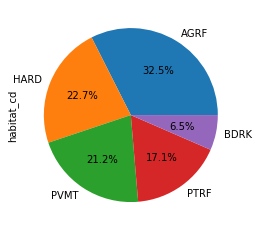

In [21]:
a = dataset['habitat_cd'].value_counts().head(5)
a.plot.pie(figsize = (4,4), autopct = '%.1f%%')

In [22]:
dataset['region'].unique()

array(['STX', 'STTSTJ'], dtype=object)

In [23]:
dataset['region_description'].unique()

array(['St. Croix - U.S. Virgin Islands',
       'St. Thomas and St. John - U.S. Virgin Islands'], dtype=object)

In [24]:
dataset['underwater_visibility'].unique()

array(['9.5', '17.5', '16.0', '20.0', '13.0', '14.5', '15.0', '25.0',
       '11.0', '16.5', '23.5', '17.0', '27.5', '22.5', '7.5', '11.5',
       '14.0', '13.5', '23.0', '12.5', '21.5', '19.0', '18.0', '12.0',
       '18.5', 14.0, 16.0, 15.0, 20.0, 15.5, 9.5, 11.0, 13.5, 17.5, 22.5,
       11.5, 12.5, 10.5, 10.0, 14.5, 16.5, 8.5, 18.0, 18.5, 12.0, 21.0,
       22.0, 19.0, 17.0, 23.5, 19.5, 25.0, 26.0, 13.0, 8.0, 9.0, 7.0,
       27.5, 7.5, 6.5, 5.0, 23.0], dtype=object)

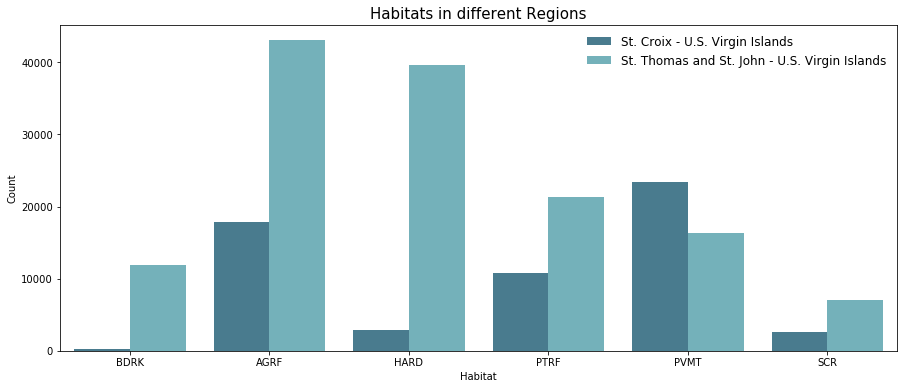

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,6))
sns.countplot(x= dataset.habitat_cd,hue= dataset.region_description, palette='GnBu_d')
plt.title('Habitats in different Regions', fontsize=15)
plt.xlabel('Habitat')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

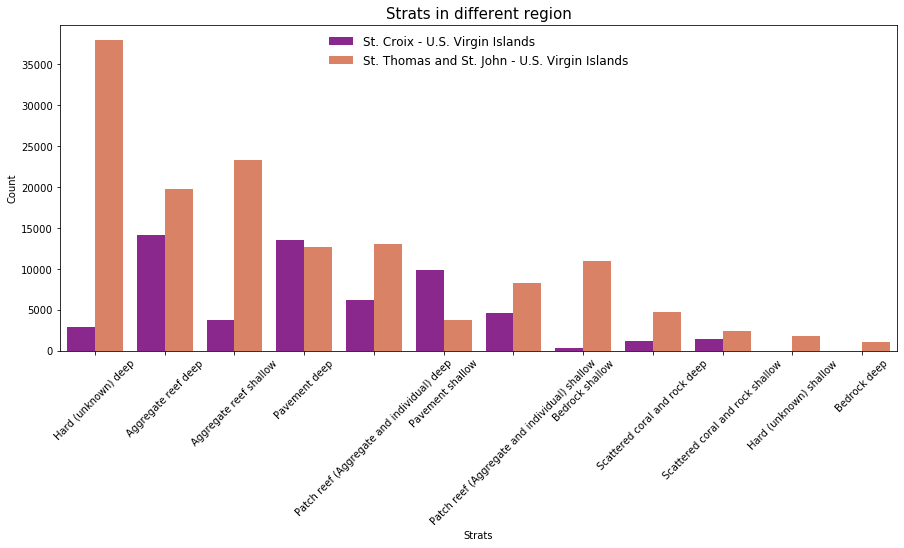

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,6))
sns.countplot(x= dataset.strat_description,hue= dataset.region_description, palette='plasma', order = dataset.strat_description.value_counts().index)
plt.title('Strats in different region', fontsize=15)
plt.xlabel('Strats')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
locks,labels = plt.xticks()
plt.setp(labels, rotation=45)


In [27]:
dataset['strat'].unique()

array(['BDRK_SHLW', 'AGRF_DEEP', 'HARD_DEEP', 'AGRF_SHLW', 'PTRF_DEEP',
       'PTRF_SHLW', 'PVMT_DEEP', 'SCR_DEEP', 'PVMT_SHLW', 'SCR_SHLW',
       'BDRK_DEEP', 'HARD_SHLW'], dtype=object)

In [28]:
dataset['strat_description'].unique()

array(['Bedrock shallow', 'Aggregate reef deep', 'Hard (unknown) deep',
       'Aggregate reef shallow',
       'Patch reef (Aggregate and individual) deep',
       'Patch reef (Aggregate and individual) shallow', 'Pavement deep',
       'Scattered coral and rock deep', 'Pavement shallow',
       'Scattered coral and rock shallow', 'Bedrock deep',
       'Hard (unknown) shallow'], dtype=object)

In [29]:
#Columns like region, strat, habitat_cd, species_cd, sub region, admin have almost duplicate columns with redundant values so we can drop them 

In [30]:
dataset['admin'].unique()

array(['BUIS', 'EEMP', 'OPEN', 'SARI', 'VICR', 'VIIS', 'STEE'],
      dtype=object)

In [31]:
dataset['administration_description'].unique()

array(['Buck Island Reef National Monument',
       'St. Croix East End Marine Park', 'All non-managed areas',
       'Salt River National Historical Park and Ecological Preserve',
       'Virgin Islands Coral Reef National Monument',
       'Virgin Islands National Park', 'St. Thomas East End Reserves'],
      dtype=object)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

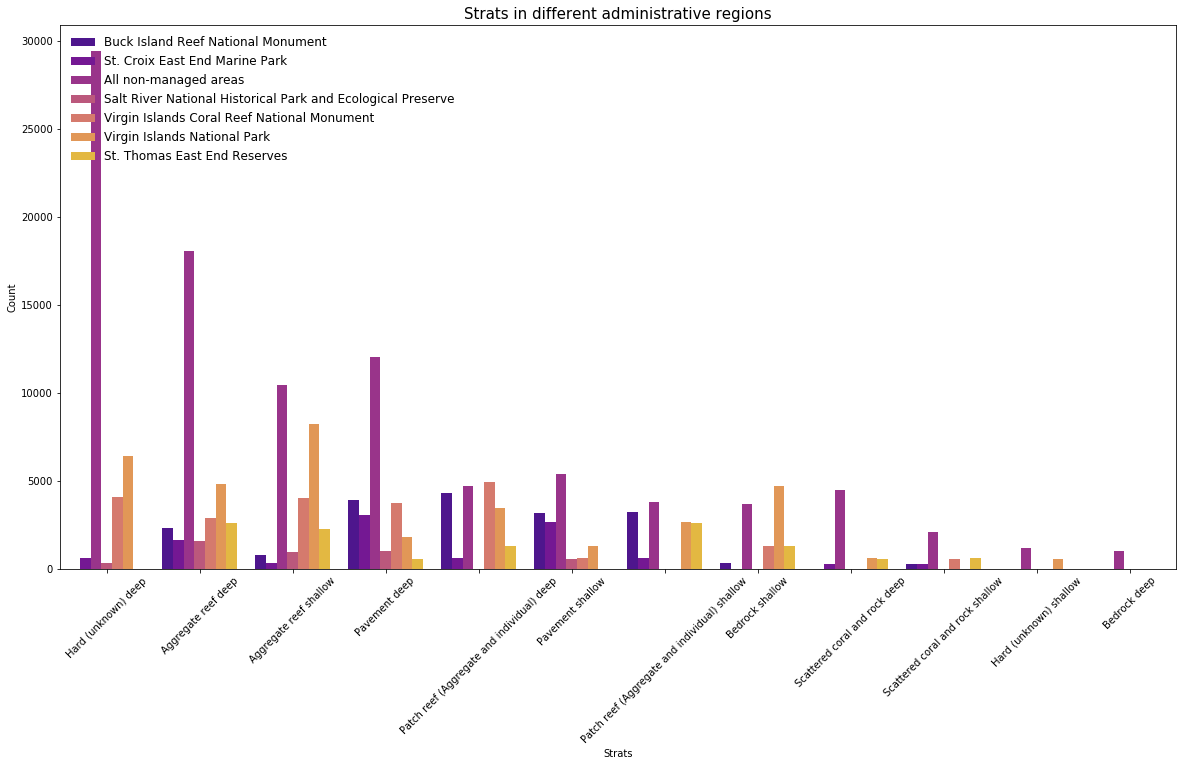

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20,10))
sns.countplot(x= dataset.strat_description,hue= dataset.administration_description, palette='plasma', order = dataset.strat_description.value_counts().index)
plt.title('Strats in different administrative regions', fontsize=15)
plt.xlabel('Strats')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
locks,labels = plt.xticks()
plt.setp(labels, rotation=45)


In [33]:
dataset['sub_region'].unique()

array(['ESTX', 'LANG', 'NWSTX', 'SSTX', 'STJ', 'STT', 'MSR', 'EDGE',
       'SLRK'], dtype=object)

In [34]:
dataset['sub_region_name_description'].unique()

array(['Eastern St. Croix', 'Lang Bank', 'Northwestern St. Croix',
       'Southern St. Croix', 'St. John', 'St. Thomas', 'Mid-shelf Reef',
       'Edge', 'Sail Rock'], dtype=object)

In [35]:
dataset.drop(['habitat_cd'], inplace = True, axis = 1)

In [36]:
dataset.drop(['species_nr'], inplace = True, axis = 1)

In [37]:
dataset.drop(['admin'], inplace = True, axis = 1)

In [38]:
dataset.drop(['sub_region'], inplace = True, axis = 1)

In [39]:
dataset.drop(['region'], inplace = True, axis = 1)

In [40]:
dataset.drop(['strat'], inplace = True, axis = 1)
dataset.drop(['accession_url'], inplace = True, axis = 1)
dataset.drop(['scientific_name'], inplace = True, axis = 1)
dataset.drop(['common_name'], inplace = True, axis = 1)
dataset.drop(['date_utc'], inplace = True, axis = 1)
dataset.drop(['latitude'], inplace = True, axis = 1)
dataset.drop(['longitude'], inplace = True, axis = 1)
dataset.drop(['grid_id'], inplace = True, axis = 1)


#dataset.drop(['species_nr'], inplace = True, axis = 1)

In [41]:
dataset.head()

,time,primary_sample_unit,station_nr,sample_depth,underwater_visibility,habitat_type,depth_strat,depth_strat_description,sub_region_name_description,administration_description,species_cd,len,num,time_seen,prot,strat_description,region_description
1,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,Bedrock,SHLW,shallow (0-11.9 m),Eastern St. Croix,Buck Island Reef National Monument,APO BINO,0.0,0.0,1.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
2,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,Bedrock,SHLW,shallow (0-11.9 m),Eastern St. Croix,Buck Island Reef National Monument,GYM MILI,0.0,0.0,1.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
3,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,Bedrock,SHLW,shallow (0-11.9 m),Eastern St. Croix,Buck Island Reef National Monument,MON CILI,0.0,0.0,1.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
4,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,Bedrock,SHLW,shallow (0-11.9 m),Eastern St. Croix,Buck Island Reef National Monument,ACA BAHI,3.0,0.0,1.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
5,2017-06-15T00:00:00Z,1000.0,1.0,1.8,9.5,Bedrock,SHLW,shallow (0-11.9 m),Eastern St. Croix,Buck Island Reef National Monument,ACA BAHI,8.0,3.0,1.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands


In [42]:
dataset.drop(['primary_sample_unit'], inplace = True, axis = 1)
dataset.drop(['station_nr'], inplace = True, axis = 1)
dataset.drop(['time_seen'], inplace = True, axis = 1)
dataset.drop(['prot'], inplace = True, axis = 1)
dataset.drop(['depth_strat_description'], inplace = True, axis = 1)
dataset.drop(['time'], inplace = True, axis = 1)



In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197514 entries, 1 to 197514
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sample_depth                 197514 non-null  object 
 1   underwater_visibility        197514 non-null  object 
 2   habitat_type                 197514 non-null  object 
 3   depth_strat                  197514 non-null  object 
 4   sub_region_name_description  197514 non-null  object 
 5   administration_description   197514 non-null  object 
 6   species_cd                   197514 non-null  object 
 7   len                          197514 non-null  object 
 8   num                          197514 non-null  float64
 9   strat_description            197514 non-null  object 
 10  region_description           197514 non-null  object 
dtypes: float64(1), object(10)
memory usage: 23.1+ MB


In [44]:
#finding the number of unique values of object type
for col_name in dataset.columns:
    if dataset[col_name].dtypes =='object':
        a = dataset[col_name].unique()
        a = len(a)
        print(col_name + " has " + str(a) + " unique vals. ")

sample_depth has 231 unique vals. 
underwater_visibility has 62 unique vals. 
habitat_type has 6 unique vals. 
depth_strat has 2 unique vals. 
sub_region_name_description has 9 unique vals. 
administration_description has 7 unique vals. 
species_cd has 232 unique vals. 
len has 215 unique vals. 
strat_description has 12 unique vals. 
region_description has 2 unique vals. 


In [45]:
dataset.drop(['depth_strat'], inplace = True, axis = 1)
dataset.drop(['sub_region_name_description'], inplace = True, axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197514 entries, 1 to 197514
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sample_depth                197514 non-null  object 
 1   underwater_visibility       197514 non-null  object 
 2   habitat_type                197514 non-null  object 
 3   administration_description  197514 non-null  object 
 4   species_cd                  197514 non-null  object 
 5   len                         197514 non-null  object 
 6   num                         197514 non-null  float64
 7   strat_description           197514 non-null  object 
 8   region_description          197514 non-null  object 
dtypes: float64(1), object(8)
memory usage: 20.1+ MB


In [46]:
dataset.head(5)

,sample_depth,underwater_visibility,habitat_type,administration_description,species_cd,len,num,strat_description,region_description
1,1.8,9.5,Bedrock,Buck Island Reef National Monument,APO BINO,0.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
2,1.8,9.5,Bedrock,Buck Island Reef National Monument,GYM MILI,0.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
3,1.8,9.5,Bedrock,Buck Island Reef National Monument,MON CILI,0.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
4,1.8,9.5,Bedrock,Buck Island Reef National Monument,ACA BAHI,3.0,0.0,Bedrock shallow,St. Croix - U.S. Virgin Islands
5,1.8,9.5,Bedrock,Buck Island Reef National Monument,ACA BAHI,8.0,3.0,Bedrock shallow,St. Croix - U.S. Virgin Islands


In [47]:
dataset.isna().sum()

sample_depth                  0
underwater_visibility         0
habitat_type                  0
administration_description    0
species_cd                    0
len                           0
num                           0
strat_description             0
region_description            0
dtype: int64

In [48]:
dataset['sample_depth']= pd.to_numeric(dataset['sample_depth']).astype(int)
dataset['underwater_visibility']= pd.to_numeric(dataset['underwater_visibility']).astype(int)
dataset['len']= pd.to_numeric(dataset['len']).astype(int)
dataset['num']= pd.to_numeric(dataset['num']).astype(int)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 197514 entries, 1 to 197514
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   sample_depth                197514 non-null  int32 
 1   underwater_visibility       197514 non-null  int32 
 2   habitat_type                197514 non-null  object
 3   administration_description  197514 non-null  object
 4   species_cd                  197514 non-null  object
 5   len                         197514 non-null  int32 
 6   num                         197514 non-null  int32 
 7   strat_description           197514 non-null  object
 8   region_description          197514 non-null  object
dtypes: int32(4), object(5)
memory usage: 17.1+ MB


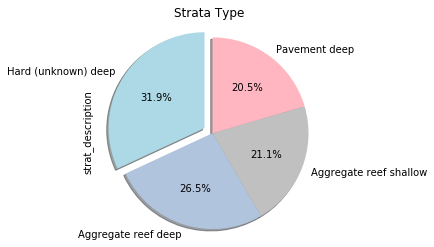

In [49]:
a = dataset['strat_description'].value_counts().head(4)
my_colors = ['lightblue','lightsteelblue','silver', 'lightpink']
my_explode = (0.1, 0, 0,0 )
a.plot.pie(figsize = (4,4), autopct = '%1.1f%%', startangle = 90, explode= my_explode, shadow= True, colors = my_colors)
plt.title('Strata Type')
plt.axis('equal')
plt.show()


In [50]:
def standarize(arg):
    if arg == "Aggregate reef deep":
        return 0
    elif arg == "Aggregate reef shallow":
        return 1
    elif arg == "Bedrock deep":
        return 2
    elif arg == "Bedrock shallow":
        return 3
    elif arg == "Hard (unknown) deep":
        return 4
    elif arg == "Hard (unknown) shallow":
        return 5
    elif arg == "Patch reef (Aggregate and individual) deep":
        return 6
    elif arg == "Patch reef (Aggregate and individual) shallow":
        return 7
    elif arg == "Pavement deep":
        return 8
    elif arg == "Pavement shallow":
        return 9
    elif arg == "Scattered coral and rock deep":
        return 10
    elif arg == "Scattered coral and rock shallow":
        return 11

In [51]:
dataset["strat_description"] = dataset["strat_description"].apply(lambda x: standarize(x))
dataset.head()

,sample_depth,underwater_visibility,habitat_type,administration_description,species_cd,len,num,strat_description,region_description
1,1,9,Bedrock,Buck Island Reef National Monument,APO BINO,0,0,3,St. Croix - U.S. Virgin Islands
2,1,9,Bedrock,Buck Island Reef National Monument,GYM MILI,0,0,3,St. Croix - U.S. Virgin Islands
3,1,9,Bedrock,Buck Island Reef National Monument,MON CILI,0,0,3,St. Croix - U.S. Virgin Islands
4,1,9,Bedrock,Buck Island Reef National Monument,ACA BAHI,3,0,3,St. Croix - U.S. Virgin Islands
5,1,9,Bedrock,Buck Island Reef National Monument,ACA BAHI,8,3,3,St. Croix - U.S. Virgin Islands


In [52]:
def dummy_df(df):
    todummy_list = ['habitat_type','species_cd', 'administration_description', 'region_description']
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    
    return df

In [53]:
dataset = dummy_df(dataset)
dataset.head(5)

,sample_depth,underwater_visibility,len,num,strat_description,Aggregate reef,Bedrock,Hard (unknown),Patch reef (Aggregate and individual),Pavement,...,XYR SPLE,All non-managed areas,Buck Island Reef National Monument,Salt River National Historical Park and Ecological Preserve,St. Croix East End Marine Park,St. Thomas East End Reserves,Virgin Islands Coral Reef National Monument,Virgin Islands National Park,St. Croix - U.S. Virgin Islands,St. Thomas and St. John - U.S. Virgin Islands
1,1,9,0,0,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,9,0,0,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,9,0,0,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,9,3,0,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,9,8,3,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [54]:
dataset.isnull().sum().sort_values(ascending = False).head()

St. Thomas and St. John - U.S. Virgin Islands    0
CRY ROSE                                         0
EPI ADSC                                         0
ELA OCEA                                         0
ELA EVEL                                         0
dtype: int64

In [55]:
X = dataset.drop('strat_description', 1)
y = dataset['strat_description']
print(X.shape)

(197514, 251)


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138259, 251)
(59255, 251)
(138259,)
(59255,)


In [58]:
# Stochastic Gradient Decent (SGD) is an optimization method for linear classifiers and regressors. It is efficient 
# and helps scale down training samples with large amounts of features.

from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

start_time = time.time()

clf = SGDRegressor(max_iter=1000, tol=1e-3)
sgd = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
SGD_training_score = sgd.score(x_train, y_train)
print('SGD train score: ', SGD_training_score)
SGD_testing_score = sgd.score(x_test, y_test)
print('SGD testing_score: ', SGD_testing_score)
print('Execution Time:  \n', time.time() - start_time, " seconds")

SGD train score:  0.9917202944348036
SGD testing_score:  0.9915817352420832
Execution Time:  
 1.2446205615997314  seconds


In [59]:
# Logistical Regression is a predictive model that works best when the target feature is binary. It is based on
# the logistic function.

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()

logr = LogisticRegression().fit(x_train, y_train)

print('Execution Time:  \n', time.time() - start_time, " seconds")


Execution Time:  
 22.74068021774292  seconds


c:\users\shreeja\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
log_training_score = logr.score(x_train, y_train)
y_pred = logr.predict(x_test)
log_training_score = round(logr.score(x_train, y_train) *100, 2 )
log_testing_score = round(logr.score(x_test, y_test)*100, 2)
print('Logistic Regression prediction: ', y_pred)
print('Training score: ', log_training_score)
print('Testing score: ', log_testing_score)
log_accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy: ',log_testing_score)



Logistic Regression prediction:  [4 0 4 ... 4 6 9]
Training score:  96.5
Testing score:  96.27
Accuracy:  96.27


In [61]:
y_train.value_counts(normalize= True).sort_index()

0     0.172264
1     0.137264
2     0.005258
3     0.056416
4     0.206735
5     0.008947
6     0.097209
7     0.064596
8     0.133105
9     0.069276
10    0.029626
11    0.019304
Name: strat_description, dtype: float64

In [62]:
y_test.value_counts(normalize=True).sort_index()

0     0.170703
1     0.135786
2     0.005147
3     0.057902
4     0.207426
5     0.008657
6     0.098253
7     0.067032
8     0.131584
9     0.068450
10    0.030276
11    0.018783
Name: strat_description, dtype: float64

In [63]:
# The Random Forest Classifier is an ensemble of individual and random decision trees working together to classify 
# data. Each tree gives a prediction, and the overal consensus becomes the overall prediction. 

start_time = time.time()

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)
random_forest_predicted = random_forest.predict(x_test)
random_forest_training_score = round(random_forest.score(x_train, y_train) *100, 2 )
random_forest_testing_score = round(random_forest.score(x_test, y_test)*100, 2)
print('Random Forest Training Score: \n', random_forest_training_score)
print('Random Forest Testing Score: \n', random_forest_testing_score)
print('Accuracy: \n', accuracy_score(y_test, random_forest_predicted))
print('Classification Report:  \n', classification_report(y_test, random_forest_predicted))
print('Confusion matrix:  \n', confusion_matrix(y_test, random_forest_predicted))
print('Execution Time:  \n', time.time() - start_time, " seconds")

Random Forest Training Score: 
 99.68
Random Forest Testing Score: 
 99.13
Accuracy: 
 0.991308750316429
Classification Report:  
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10115
           1       0.99      0.98      0.99      8046
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00      3431
           4       1.00      1.00      1.00     12291
           5       1.00      1.00      1.00       513
           6       0.97      0.98      0.98      5822
           7       0.97      0.96      0.96      3972
           8       1.00      1.00      1.00      7797
           9       1.00      1.00      1.00      4056
          10       1.00      1.00      1.00      1794
          11       1.00      1.00      1.00      1113

    accuracy                           0.99     59255
   macro avg       0.99      0.99      0.99     59255
weighted avg       0.99      0.99      0.99     59255

Co

In [64]:
# K-Nearest Neighbor Classification is an unsupervised algorithm, and works by understanding the basic structure of
# the data. It makes predictions under the assumption that similar data exists in close proximity. By calculating distance
# between graphed points, it classifies data based on its closeness to similar data.

start_time = time.time()

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_prediction = knn.predict(x_test)
knn_training_accuracy = round(accuracy_score(y_train, knn.predict(x_train)) *100, 2)
knn_testing_accuracy = round(accuracy_score(y_test, y_prediction)*100 , 2)
print("Training accuracy is: ", knn_training_accuracy)
print("Testing accuracy is: ", knn_testing_accuracy)
print('Classification Report:  \n', classification_report(y_test, y_prediction ))
print('Confusion Matrix \n', confusion_matrix(y_test, y_prediction))
print('Execution Time:  \n', time.time() - start_time, " seconds")

Training accuracy is:  91.56
Testing accuracy is:  85.8
Classification Report:  
               precision    recall  f1-score   support

           0       0.77      0.93      0.85     10115
           1       0.89      0.74      0.80      8046
           2       0.89      0.63      0.74       305
           3       0.97      0.96      0.96      3431
           4       0.97      0.98      0.98     12291
           5       0.99      0.20      0.33       513
           6       0.80      0.89      0.84      5822
           7       0.85      0.63      0.72      3972
           8       0.82      0.94      0.88      7797
           9       0.88      0.62      0.73      4056
          10       0.76      0.91      0.83      1794
          11       0.83      0.52      0.64      1113

    accuracy                           0.86     59255
   macro avg       0.87      0.75      0.77     59255
weighted avg       0.86      0.86      0.85     59255

Confusion Matrix 
 [[ 9453   631     0     0     4 

In [65]:
# In a Decision Tree classifier, data is sent through binary nodes, contiously being split based upon certain features
# until it reaches a leaf node, where a prediction is made.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

start_time = time.time()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
print('Execution Time:  \n', time.time() - start_time, " seconds")


Execution Time:  
 2.447894334793091  seconds


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(x_test)

decisionTree_score = accuracy_score(y_test, y_pred)
print("Accuracy score: ", decisionTree_score)
print(classification_report(y_test, y_pred))

Accuracy score:  0.9915281410851405
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10115
           1       0.99      0.98      0.99      8046
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00      3431
           4       1.00      1.00      1.00     12291
           5       1.00      1.00      1.00       513
           6       0.97      0.98      0.98      5822
           7       0.97      0.96      0.97      3972
           8       1.00      1.00      1.00      7797
           9       1.00      1.00      1.00      4056
          10       1.00      1.00      1.00      1794
          11       1.00      1.00      1.00      1113

    accuracy                           0.99     59255
   macro avg       0.99      0.99      0.99     59255
weighted avg       0.99      0.99      0.99     59255



In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9915281410851405


In [68]:
decisionTree_training_score = round(clf.score(x_train, y_train) *100, 2 )
decisionTree_testing_score = round(clf.score(x_test, y_test)*100, 2)
print("Training score", decisionTree_training_score)
print("Testing score", decisionTree_testing_score)

Training score 99.68
Testing score 99.15


In [69]:
model_evaluation = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest', 'Decision Tree(gini)'],
    'Training Score': [ log_training_score,knn_training_accuracy,random_forest_training_score, decisionTree_training_score],
    'Test Score': [ log_testing_score, knn_testing_accuracy, random_forest_testing_score, decisionTree_testing_score],
    })
model_evaluation.sort_values(by='Test Score', ascending=True)

,Model,Training Score,Test Score
1,KNN,91.56,85.80
0,Logistic Regression,96.50,96.27
2,Random Forest,99.68,99.13
3,Decision Tree(gini),99.68,99.15
